In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#разделение на обучающию и тестовую выборки
data_train, data_test, y_train, y_test = train_test_split(data.drop(columns='SalePrice'), data['SalePrice'], test_size=0.30, random_state=42)

In [7]:
#преобразования данных из лекции

#Находим категориальные признаки

categorials = list(data.dtypes[data.dtypes == object].index)

categorials_nunique = data_train[categorials].nunique()

#закодируем пропущенные значений строкой, факт пропущенного значения тоже может нести в себе информацию
data[categorials] = data[categorials].fillna('nan')

#отфильтруем непрерывные признаки
integer = [f for f in data if f not in (categorials + ['ID', 'SalePrice'])]

In [8]:
# Создаем дамми-переменные для категорий
dummy_train = pd.get_dummies(data_train[categorials], columns=categorials)
dummy_test = pd.get_dummies(data_test[categorials], columns=categorials)

dummy_cols = list(set(dummy_train) & set(dummy_test))

dummy_train = dummy_train[dummy_cols]
dummy_test = dummy_test[dummy_cols]

# Заменяем пропуски на специальное значение -999, чтобы деревья могли их отличить
X_train = pd.concat([data_train[integer].fillna(-999), dummy_train], axis=1)

X_test = pd.concat([data_test[integer].fillna(-999), dummy_test], axis=1)

In [9]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Exterior1st_Stone,BsmtFinType1_ALQ,SaleType_ConLD,MSZoning_FV,Alley_Grvl,LotConfig_Corner,Neighborhood_BrDale,Exterior2nd_HdBoard,Exterior1st_HdBoard,Utilities_AllPub
135,136,20,80.0,10400,7,6,1970,1970,288.0,0,...,0,0,0,0,0,0,0,0,0,1
1452,1453,180,35.0,3675,5,5,2005,2005,80.0,547,...,0,0,0,0,0,0,0,0,0,1
762,763,60,72.0,8640,7,5,2009,2009,0.0,24,...,0,0,0,1,0,0,0,0,0,1
932,933,20,84.0,11670,9,5,2006,2006,302.0,0,...,0,0,0,0,0,1,0,0,0,1
435,436,60,43.0,10667,7,6,1996,1996,0.0,385,...,0,0,0,0,0,0,0,0,0,1


In [10]:
#Построить случайный лес, вывести важность признаков
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
#на обучающей выборке
clf_rf.score(X_train, y_train)

0.9764181230232365

In [12]:
#на тестовой выборке
clf_rf.score(X_test, y_test)

0.8915118736073933

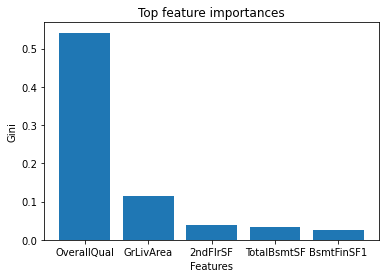

In [19]:
feature_imp = pd.Series(clf_rf.feature_importances_)
feature_imp.index = pd.Series(X_train.columns)
plt.title('Top feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(feature_imp.sort_values(ascending=False).head().index, feature_imp.sort_values(ascending=False).head())
plt.show()

In [20]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [25]:
#Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную
stacking_reg = StackingRegressor(
    [
        ('LinearRegression', LinearRegression()),
        ('KNeighborsRegressor', KNeighborsRegressor()),
        ('DecisionTree', DecisionTreeRegressor())
    ], LinearRegression(), cv=10)

In [26]:
stacking_reg.fit(X_train, y_train)

StackingRegressor(cv=10,
                  estimators=[('LinearRegression', LinearRegression()),
                              ('KNeighborsRegressor', KNeighborsRegressor()),
                              ('DecisionTree', DecisionTreeRegressor())],
                  final_estimator=LinearRegression())

In [27]:
#Показать, что использование ансамблей моделей действительно улучшает качество
print(f'Score on train data {stacking_reg.score(X_train, y_train)}')
print(f'Score on test data {stacking_reg.score(X_test, y_test)}')

for i in stacking_reg.named_estimators:
    print(f'Score on train data with model {i} {stacking_reg.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test data with model {i} {stacking_reg.named_estimators_[i].score(X_test, y_test)}')

Score on train data 0.9661949567060862
Score on test data 0.874661937931063
Score on train data with model LinearRegression 0.9221085403562432
Score on test data with model LinearRegression 0.8533836050579299
Score on train data with model KNeighborsRegressor 0.7419951520813983
Score on test data with model KNeighborsRegressor 0.6775304068635524
Score on train data with model DecisionTree 1.0
Score on test data with model DecisionTree 0.7833031071156606
